<a href="https://colab.research.google.com/github/SFaegheh/Simple-Codes-DL/blob/main/Mnist_dataset_Classification_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(train_labels.shape)
print(train_labels)

(60000,)
[9 0 0 ... 3 0 5]


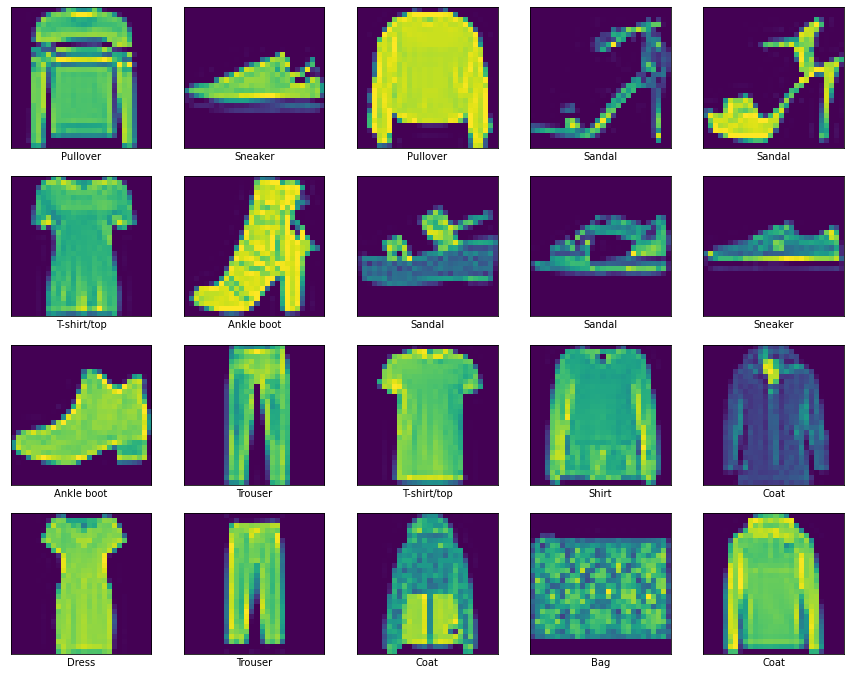

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15,15))

for i in range(5,25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
    pass
plt.show()

In [7]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0


x_train = np.array(train_images)
y_train = keras.utils.to_categorical(train_labels, num_classes=10)
x_test = np.array(test_images)
y_test = keras.utils.to_categorical(test_labels, num_classes=10)

In [10]:
model = Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
model.add( tf.keras.layers.Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 22s 2ms/step - loss: 0.6261 - accuracy: 0.7770
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3706 - accuracy: 0.8637
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3269 - accuracy: 0.8778
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3005 - accuracy: 0.8902
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2894 - accuracy: 0.8915
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2648 - accuracy: 0.9016
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - accuracy: 0.9036
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9081
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2359 - accuracy: 0.9114
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - 

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_4 (ModuleWrap (32, 784)                 0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (32, 128)                 100480    
_________________________________________________________________
module_wrapper_6 (ModuleWrap (32, 128)                 16512     
_________________________________________________________________
module_wrapper_7 (ModuleWrap (32, 10)                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [15]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.9860 - accuracy: 0.8879

Testing loss: 0.99, acc: 0.89%


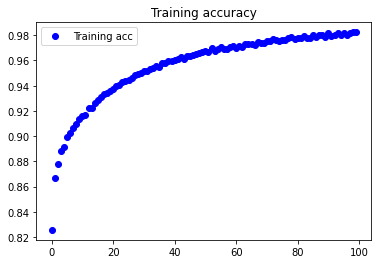

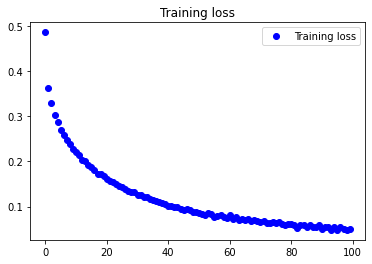

In [16]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[10]

array([1.3595195e-15, 5.3434825e-18, 1.2595353e-06, 2.1781634e-17,
       9.9999869e-01, 1.3444621e-27, 1.8118918e-13, 4.8679349e-32,
       3.9562989e-20, 3.9836422e-31], dtype=float32)

In [19]:
np.argmax(predictions[10])

4

In [20]:
test_labels[10]

4